# 8 Efficiently searching for optimal tuning parameters

## Review of K-fold cross-validation

### Steps for cross-validation:

    Dataset is split into K "folds" of equal size
    Each fold acts as the testing set 1 time, and acts as the training set K-1 times
    Average testing performance is used as the estimate of out-of-sample performance

### Benefits of cross-validation:

    More reliable estimate of out-of-sample performance than train/test split
    Can be used for selecting tuning parameters, choosing between models, and selecting features

## Drawbacks of cross-validation:

    Can be computationally expensive



##Review of parameter tuning using cross_val_score

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset


In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

###Cross validation to find the train_test split

In [3]:
#remember that the function corss_val_Score takes care of the train/test split for you. 
#that is why you pass it X and y in their entirety, and not X_train and y_train.
#what it 
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [4]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.966666666667


###Cross validation to find the best value for k

In [7]:
# search for an optimal value of K for KNN
k_range = range(1, 61)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.96000000000000019, 0.95333333333333348, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96000000000000019, 0.96666666666666679, 0.96000000000000019, 0.96666666666666679, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94000000000000006, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.9333333333

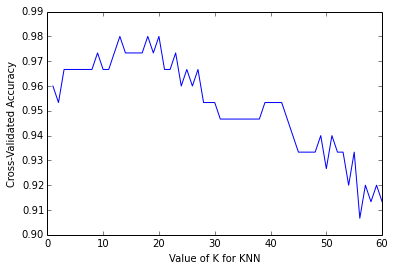

In [8]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


#More efficient parameter tuning using GridSearchCV

Allows you to define a **grid of parameters** that will be searched using K-fold cross-validation


In [9]:
from sklearn.grid_search import GridSearchCV

In [11]:
#replaces the for loop above!!!
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]}


In [13]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs=-1)

###You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)

In [15]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=60, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [16]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [17]:
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [18]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.93999999999999995, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.9333333333

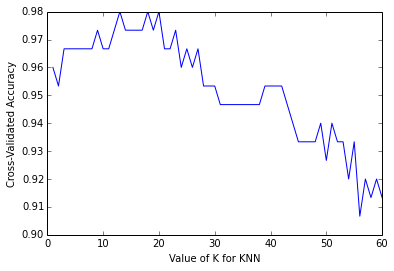

In [19]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [21]:
# examine the best model!!!!!!!!!
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=13, p=2, weights='uniform')


#Searching multiple parameters simultaneously

   **Example:** tuning max_depth and min_samples_leaf for a DecisionTreeClassifier
   
   Could tune parameters **independently:** change max_depth while leaving min_samples_leaf at its default value, and vice versa
   
   But, best performance might be achieved when **neither parameter** is at its default value



In [22]:
# define the parameter values that should be searched
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

In [23]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [30]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=10,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=60, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [31]:
# view the complete results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [32]:
# examine the best model
print grid.best_score_
print grid.best_params_

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


#Using the best parameters to make predictions

In [35]:
# train your model using all data and the best known parameters
#(REMEBER: even if you split train and test, once you find optimal parmaeters, train
#on the ENTIRE data set and the optimal parameters. Do not train on train and test
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([3, 5, 4, 2])

array([1])

In [34]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([3, 5, 4, 2])

array([1])

#Reducing computational expense using RandomizedSearchCV


   Searching many different parameters at once may be computationally infeasible

RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"



In [39]:
from sklearn.grid_search import RandomizedSearchCV
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

In [37]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

**Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

In [53]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.grid_scores_

[mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 17, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 17, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 13, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 18, 'weights': 'distance'}]

In [54]:
# examine the best model
print rand.best_score_
print rand.best_params_

0.98
{'n_neighbors': 17, 'weights': 'distance'}


In [49]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
#EXPERIMENT
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print best_scores

[0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.973, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98]
